# Исследовательский анализ недвижимости в Санкт-Петербурге и соседних населённых пунктов



## Описание проекта

Имея данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Нужно определять рыночную стоимость объектов недвижимости и установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

### План задачи

Подключить библиотеки, и обработать данные

Подготовить и предобработать данные

Изучить и проверить данные

Сделать вывод по исследованию

## Подготовка данных

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [149]:
data = pd.read_csv('/Users/Риндикт/notebook/Квартиры/real_estate_data.csv','\t')

C:\Users\Риндикт\AppData\Local\Temp\ipykernel_3232\3958999959.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv('/Users/Риндикт/notebook/Квартиры/real_estate_data.csv','\t')


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [151]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


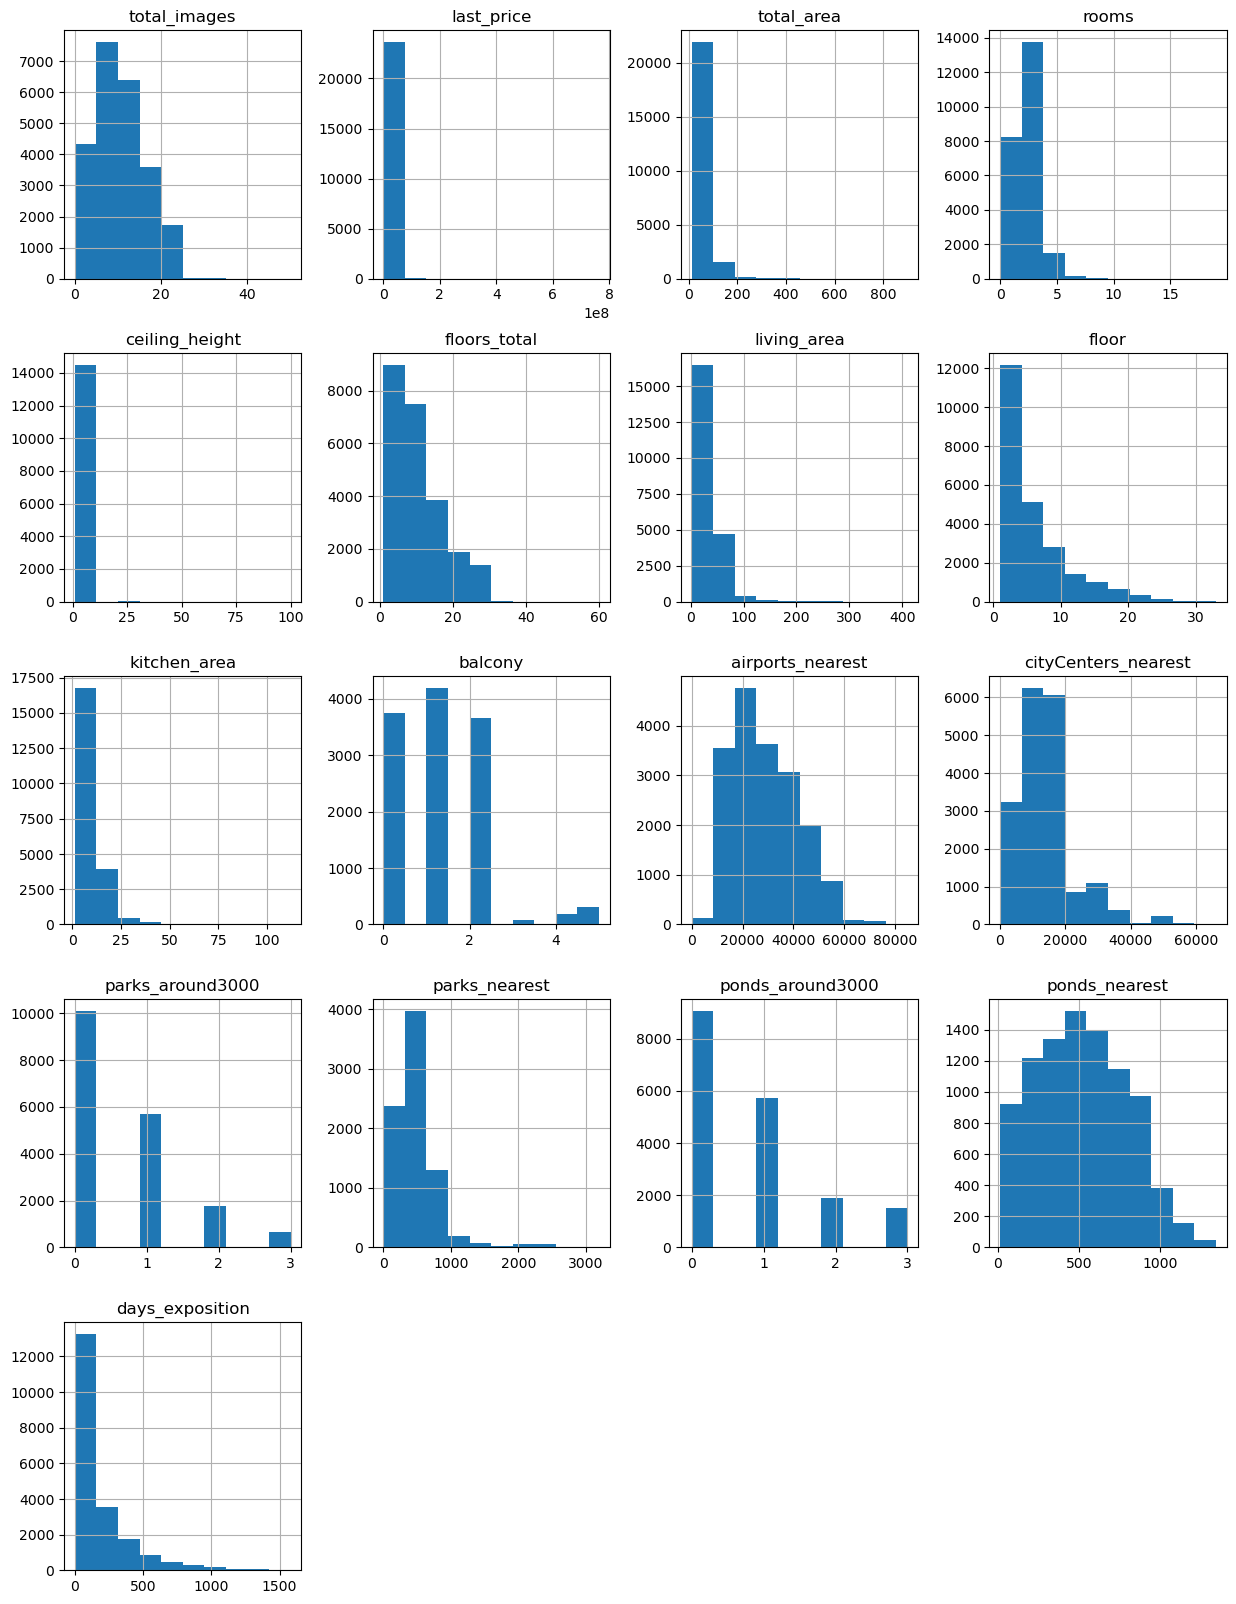

In [152]:
data.hist(figsize=(15, 20),bins=10)
plt.show()

Открыл и изучил дынные.

### Предобработка данных

In [153]:
def info(data):
    ''' 
    Функция для предварительной обработки датасетов
    '''
    
    print("Дубликатов обнаружено: ", data.duplicated().sum())
    if data.duplicated().sum() >0:
        print('Обнаружены дубликаты, произвожу очистку')
        data = data.drop_duplicates()
        print('Дубликаты ',data.duplicated().sum())
    print()
    print('Пропусков обнаружено:\n',data.isna().sum())
    print()
    data.info()
    return data

In [154]:
data = info(data)

Дубликатов обнаружено:  0

Пропусков обнаружено:
 total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_pric

In [155]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Исправлены пропуски я пологою они были в данных строчках из-за того что поблизости не было парков, водоёмов и в данных квартирах не было балконов.

In [156]:
price = data.sort_values(by ='last_price', ascending = True)
price.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,0.0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,...,6.0,0.0,Сланцы,NaN,NaN,0.0,NaN,0.0,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,...,NaN,0.0,посёлок станции Свирь,NaN,NaN,0.0,NaN,0.0,NaN,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,0.0,деревня Старополье,NaN,NaN,0.0,NaN,0.0,NaN,45.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,NaN,...,8.5,1.0,деревня Ям-Тесово,NaN,NaN,0.0,NaN,0.0,NaN,120.0


In [157]:
data = data.dropna(subset = ['living_area'])
data = data.dropna(subset = ['locality_name'])
data = data.dropna(subset = ['floors_total'])

Были удалены строки в которых отсутствовало название местности.

In [158]:
#конвертирую в целочисленный тип данные которым не требуется дробная часть
data['last_price'] = data['last_price'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)

In [159]:
# Переименовываю столбец к общему варианту написания
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'})

In [160]:
# Отсеиваю слишком большие и слишком маленькие потолки
data.loc[(data['ceiling_height'] >= 4) | (data['ceiling_height'] < 2.0), 'ceiling_height'] = data['ceiling_height'].median()

In [161]:
# Перевожу дату в более читаемый формат
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.4,2018-09-10,1,NaN,12,14.4,5,NaN,...,9.1,0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0


In [162]:
# Перевожу метры в километры для удобства
data['airports_nearest'] = round(data['airports_nearest']/1000)
data['city_centers_nearest'] = round(data['city_centers_nearest']/1000)

In [163]:
data['locality_name'].value_counts()
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

In [164]:
data.duplicated().sum()

0

In [165]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,21700.000000,2.170000e+04,21700.000000,21700.000000,13687.000000,21700.000000,21700.000000,21700.000000,20905.000000,21700.000000,16794.000000,16815.000000,21700.000000,7467.000000,21700.000000,8359.000000,18724.000000
mean,10.029355,6.499828e+06,60.061487,2.071567,2.716494,10.648065,34.454822,5.877051,10.509280,0.617788,28.781350,14.233304,0.473088,488.140083,0.592396,519.405072,184.742897
std,5.676967,1.088467e+07,34.698564,1.080600,0.248611,6.566794,22.045359,4.855324,5.841913,0.968415,12.659889,8.677631,0.749742,338.195771,0.884493,277.348514,221.370959
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,19.000000,9.000000,0.000000,287.000000,0.000000,295.500000,44.000000
50%,10.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,27.000000,13.000000,0.000000,452.000000,0.000000,503.000000,101.000000
75%,14.000000,6.750000e+06,69.500000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37.000000,16.000000,1.000000,610.000000,1.000000,731.000000,238.000000
max,50.000000,7.630000e+08,900.000000,19.000000,3.980000,60.000000,409.700000,33.000000,112.000000,5.000000,85.000000,66.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [166]:
data.sort_values('balcony')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,25.00,0,Санкт-Петербург,19.0,16.0,1.0,482.0,2.0,755.0,NaN
13997,13,1000000,27.90,2019-04-11,2,2.60,2,17.00,1,NaN,...,5.00,0,посёлок городского типа Ульяновка,NaN,NaN,0.0,NaN,0.0,NaN,NaN
13998,20,5654000,56.00,2018-05-31,2,2.50,9,38.00,7,NaN,...,7.00,0,Санкт-Петербург,32.0,9.0,2.0,342.0,1.0,140.0,190.0
13999,6,4250000,34.23,2019-03-10,1,NaN,14,15.05,9,NaN,...,10.34,0,Санкт-Петербург,34.0,16.0,0.0,NaN,1.0,972.0,40.0
14000,10,7000000,58.40,2018-08-06,2,NaN,17,31.80,16,NaN,...,10.60,0,Санкт-Петербург,9.0,14.0,2.0,676.0,1.0,1158.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,15,13900000,93.00,2018-10-18,3,NaN,16,43.00,5,NaN,...,14.00,5,Санкт-Петербург,31.0,7.0,1.0,59.0,2.0,58.0,NaN
267,2,14700000,120.00,2018-09-07,3,2.75,20,63.00,18,NaN,...,16.00,5,Санкт-Петербург,39.0,10.0,2.0,627.0,3.0,77.0,61.0
23289,13,7000000,88.00,2018-03-02,3,2.50,15,54.00,12,False,...,12.00,5,Колпино,25.0,30.0,1.0,372.0,0.0,NaN,NaN
12482,19,11900000,77.10,2017-07-10,2,2.70,10,50.40,10,NaN,...,27.50,5,Санкт-Петербург,24.0,5.0,1.0,2295.0,1.0,534.0,139.0


In [167]:
data = data.query('last_price > 400000 and last_price < 50000000')
data = data.query('rooms+1 > balcony')

#### Добавляю в таблицу новые столбцы

In [168]:
#Считаю стоимость квадратного метра и конвертирую его в целочисленное значение для лучшего понимания
data['price_for_meter2'] = data['last_price']/data['total_area']
data['price_for_meter2'] = data['price_for_meter2'].astype(int)

In [189]:
data['day_of_week'] = pd.to_datetime(data['first_day_exposition']).dt.dayofweek
data['day_name'] = data['first_day_exposition'].dt.day_name()
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data['month_exposition'] = data['first_day_exposition'].apply(lambda x: x.strftime('%B'))
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter2,day_of_week,day_name,year,month_exposition,floor_type,month
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,2.0,755.0,NaN,120370,3,Thursday,2019,March,Другой,3
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,NaN,...,2.0,574.0,558.0,92785,3,Thursday,2015,August,Другой,8
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,1.0,48.0,121.0,100000,1,Tuesday,2018,June,Другой,6
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,NaN,...,0.0,NaN,55.0,95065,0,Monday,2018,September,Другой,9
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,NaN,...,0.0,NaN,155.0,99195,3,Thursday,2017,November,Другой,11
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,NaN,...,0.0,NaN,189.0,87454,2,Wednesday,2018,May,Другой,5
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,0.0,NaN,289.0,88524,6,Sunday,2017,February,Другой,2
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,NaN,...,2.0,553.0,137.0,127525,3,Thursday,2017,November,Другой,11
11,9,3300000,44.00,2018-08-27,2,NaN,5,31.00,4,False,...,0.0,NaN,7.0,75000,0,Monday,2018,August,Другой,8
12,10,3890000,54.00,2016-06-30,2,NaN,5,30.00,5,NaN,...,0.0,NaN,90.0,72037,3,Thursday,2016,June,Последний,6


In [190]:
def floor_group(i):#Добавляю столбец тип этажа квартиры
    if i['floor'] == 1:
        return 'Первый'
    elif i['floor'] == i['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
        print (i)

data['floor_type'] = data.apply(floor_group, axis=1)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter2,day_of_week,day_name,year,month_exposition,floor_type,month
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,2.0,755.0,NaN,120370,3,Thursday,2019,March,Другой,3
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,NaN,...,2.0,574.0,558.0,92785,3,Thursday,2015,August,Другой,8
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,1.0,48.0,121.0,100000,1,Tuesday,2018,June,Другой,6
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,NaN,...,0.0,NaN,55.0,95065,0,Monday,2018,September,Другой,9
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,NaN,...,0.0,NaN,155.0,99195,3,Thursday,2017,November,Другой,11
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,NaN,...,0.0,NaN,189.0,87454,2,Wednesday,2018,May,Другой,5
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,0.0,NaN,289.0,88524,6,Sunday,2017,February,Другой,2
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,NaN,...,2.0,553.0,137.0,127525,3,Thursday,2017,November,Другой,11
11,9,3300000,44.00,2018-08-27,2,NaN,5,31.00,4,False,...,0.0,NaN,7.0,75000,0,Monday,2018,August,Другой,8
12,10,3890000,54.00,2016-06-30,2,NaN,5,30.00,5,NaN,...,0.0,NaN,90.0,72037,3,Thursday,2016,June,Последний,6


#### Итог

Изучая данные нашел и исправил важные пропуски.

Отсеял выбросы которые мешали бы изучения данных.

Перевёл в более удобные величины и исправил название столбца.

Добавил новые столбцы дней недели, месяцев и годов публикации объявлений.

Посчитал стоимость квадратного метра в квартире.

##  Анализ данных

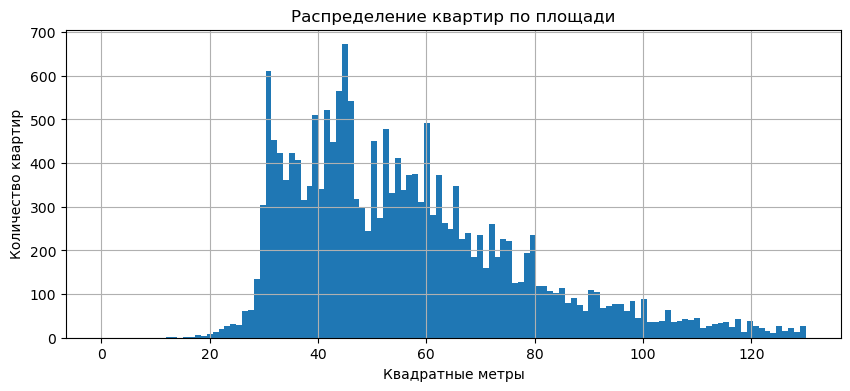

In [191]:
plt.figure(figsize = (10,4))
data['total_area'].hist(range = (0,130),bins = 120)
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по площади')
plt.show()

На данной гистограмме видно, что большая часть продаваемых квартир имеет площадь около 60м2 45-50м2 и примерно 30м2 вероятно распространённые размеры для 1, 2-х и 3‑х комнатных квартир

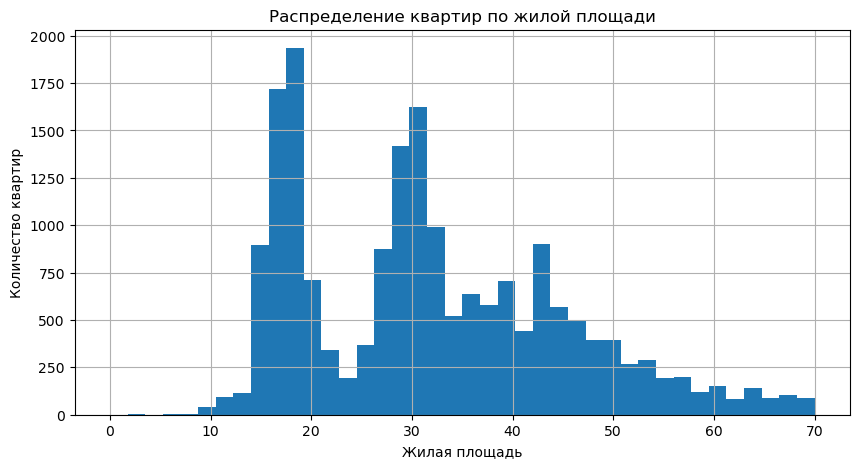

In [192]:
plt.figure(figsize = (10,5))
data['living_area'].hist(range = (0,70),bins = 40)
plt.xlabel('Жилая площадь')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по жилой площади')
plt.show()

У жилой площади есть 2 пика в 18м2 и 30м2, так же он схож с прошлым графиком

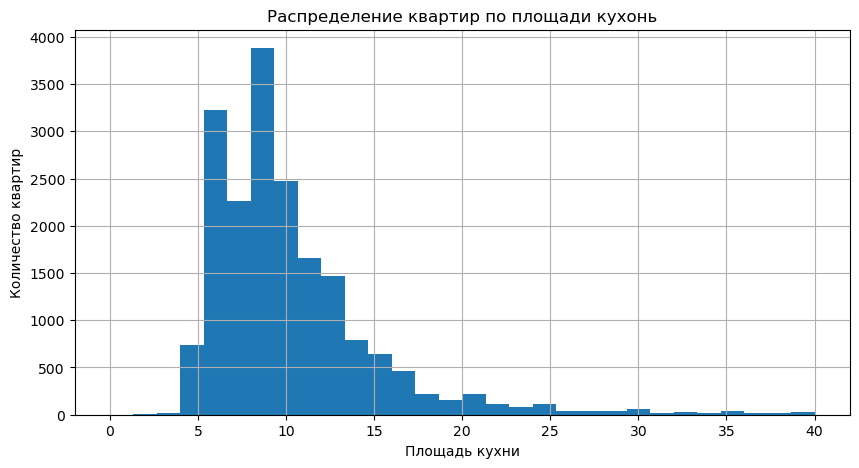

In [193]:
plt.figure(figsize = (10,5))
data['kitchen_area'].hist(range = (0,40),bins = 30)
plt.xlabel('Площадь кухни')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по площади кухонь')
plt.show()

Тут видно 2 пика в 6 и в 8-9м2

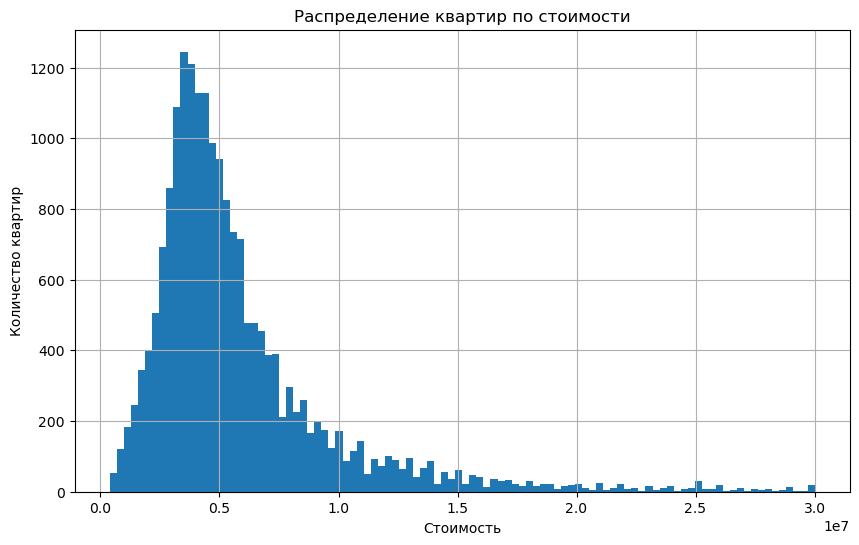

In [194]:
plt.figure(figsize = (10,6))
data['last_price'].hist(bins = 100,range = (400000,30000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по стоимости')
plt.show()

Большая часть квартир стоит примерно 3,5/4 миллиона

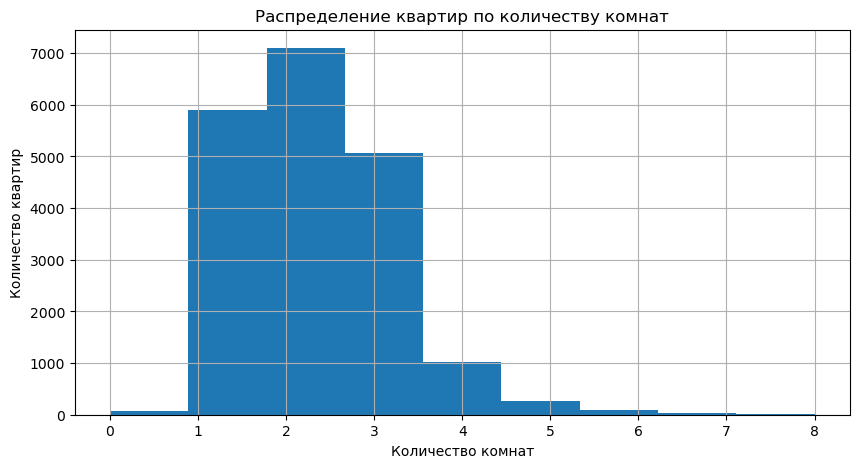

In [195]:
plt.figure(figsize = (10,5))
data['rooms'].hist(bins = 9,range = (0,8))
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по количеству комнат')
plt.show()

Большая часть квартир это 1/2х команытные квартиры

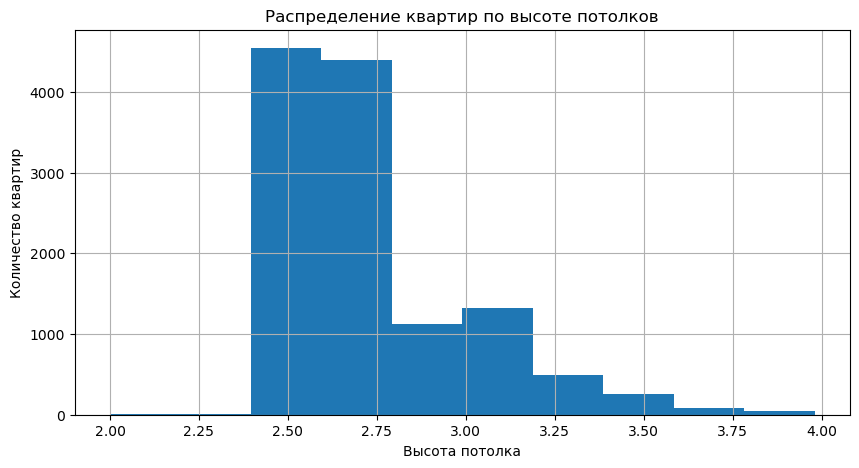

In [196]:
plt.figure(figsize = (10,5))
data['ceiling_height'].hist(bins = 10)
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир')
plt.title('Распределение квартир по высоте потолков')
plt.show()

Сегодня минимальной нормой в России считается высота потолка 2,4 метра. В новостройках обычно это значение находится в пределах 2,5-2,7 метра. Для элитного жилья показатель может превышать 3 метра. Что на графике прекрасно и показывается

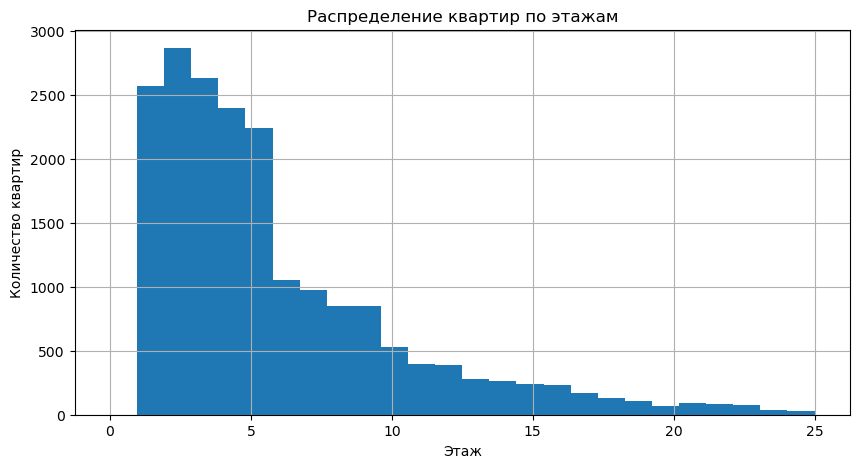

In [197]:
plt.figure(figsize = (10,5))
data['floor'].hist(bins = 26,range=(0,25))
plt.ylabel('Количество квартир')
plt.xlabel('Этаж')
plt.title('Распределение квартир по этажам')
plt.show()

Большинство квартир продаются на первых 5 этажах

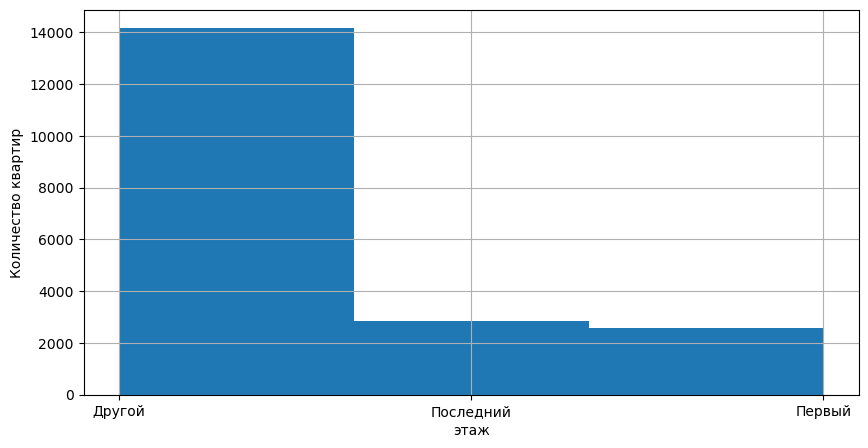

In [198]:
plt.figure(figsize = (10,5))
data['floor_type'].hist(bins = 3)
plt.ylabel('Количество квартир')
plt.xlabel('этаж')
plt.show()

Большая часть квартир как и ожидалось продаётся на этожи между первым и последним)

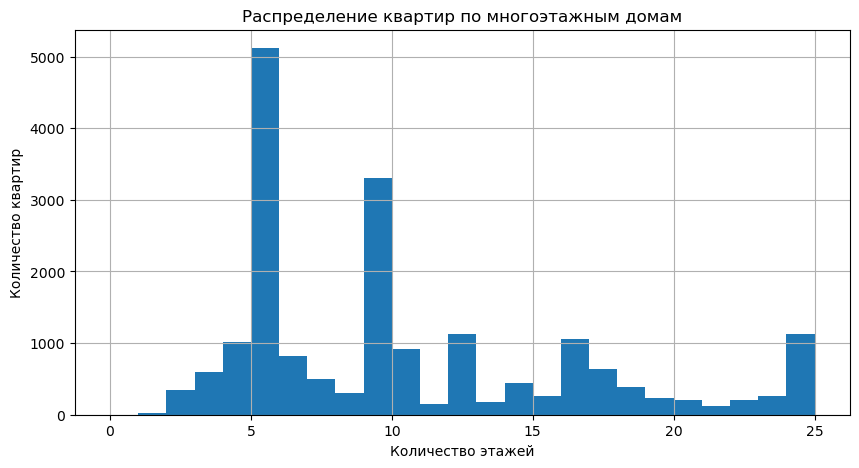

In [199]:
plt.figure(figsize = (10,5))
data['floors_total'].hist(bins = 25,range=(0,25))
plt.ylabel('Количество квартир')
plt.xlabel('Количество этажей')
plt.title('Распределение квартир по многоэтажным домам')
plt.show()

На гистограмме два пика в 5х и 9 этажных домах квартир продается больше всего

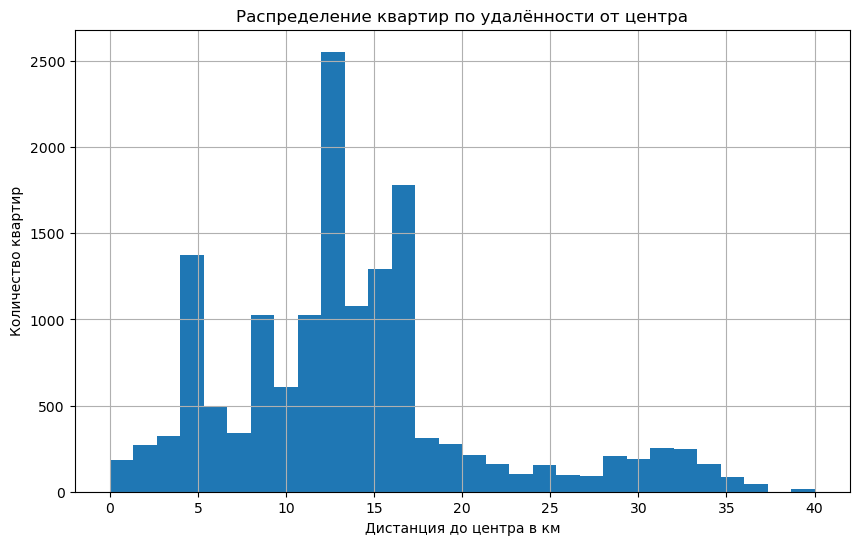

In [200]:
plt.figure(figsize = (10,6))
data['city_centers_nearest'].hist(bins = 30,range = (0,40))
plt.ylabel('Количество квартир')
plt.xlabel('Дистанция до центра в км')
plt.title('Распределение квартир по удалённости от центра')
plt.show()

Квартиры продаются на некотором отдалении от центра города/на окраине и чаще всего не дальше 20 км от центра города.

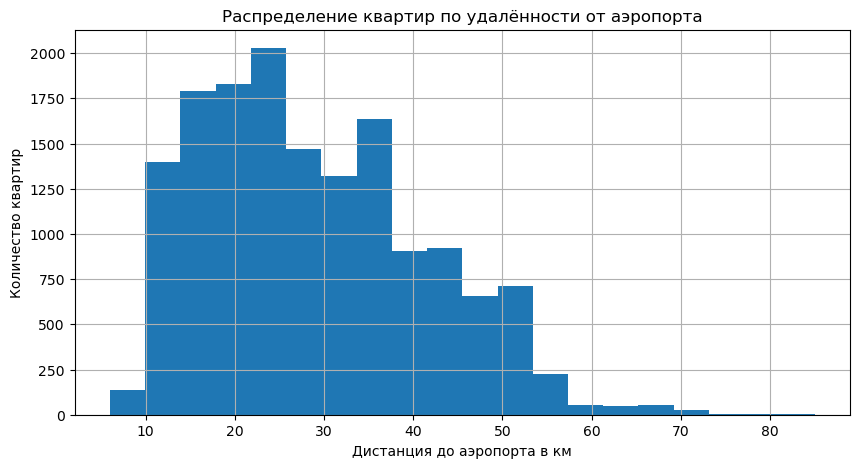

In [201]:
plt.figure(figsize = (10,5))
data['airports_nearest'].hist(bins = 20)
plt.ylabel('Количество квартир')
plt.xlabel('Дистанция до аэропорта в км')
plt.title('Распределение квартир по удалённости от аэропорта')
plt.show()

Квартиры находятся на отдалении от аэропорта, населённых пунктов много, а аэропорт один и расстояние 20/25км как раз и охватывают Питер.

Есть так же пик около 40км так как в него попадают крупные поселения (Тосно, Никольское, Токсово, Сертолово и Сестрорецк)

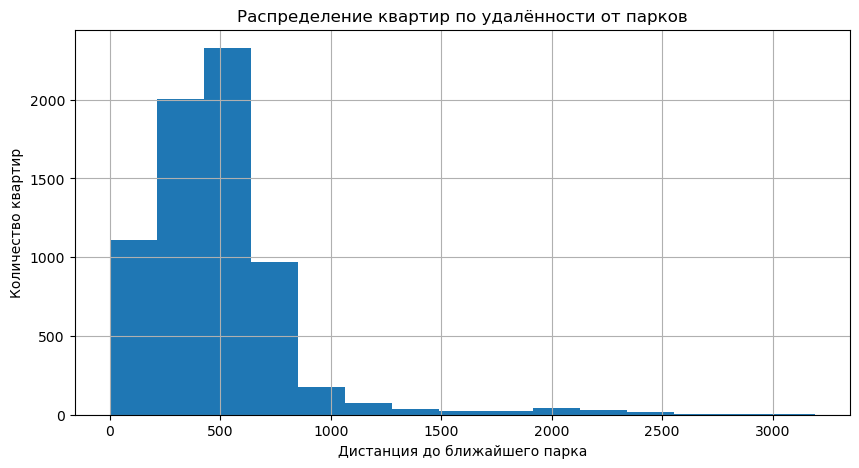

In [202]:
plt.figure(figsize = (10,5))
data['parks_nearest'].hist(bins = 15)
plt.ylabel('Количество квартир')
plt.xlabel('Дистанция до ближайшего парка')
plt.title('Распределение квартир по удалённости от парков')
plt.show()

Парки находятся обычно в пешей доступности

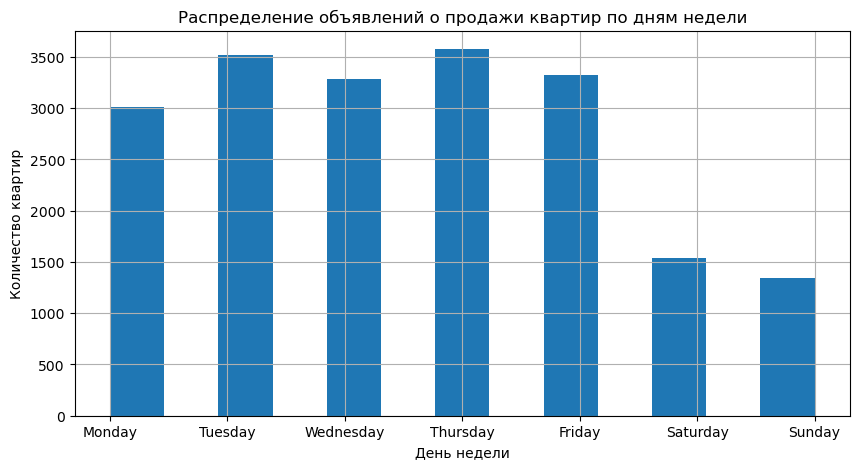

In [206]:
plt.figure(figsize = (10,5))
data.sort_values(by = 'day_of_week')['day_name'].hist(bins = 13)
plt.ylabel('Количество квартир')
plt.xlabel('День недели')
plt.title('Распределение объявлений о продажи квартир по дням недели')
plt.show()

Объявлений вывешивают больше всего в середине неделе на выходных же их совсем мало

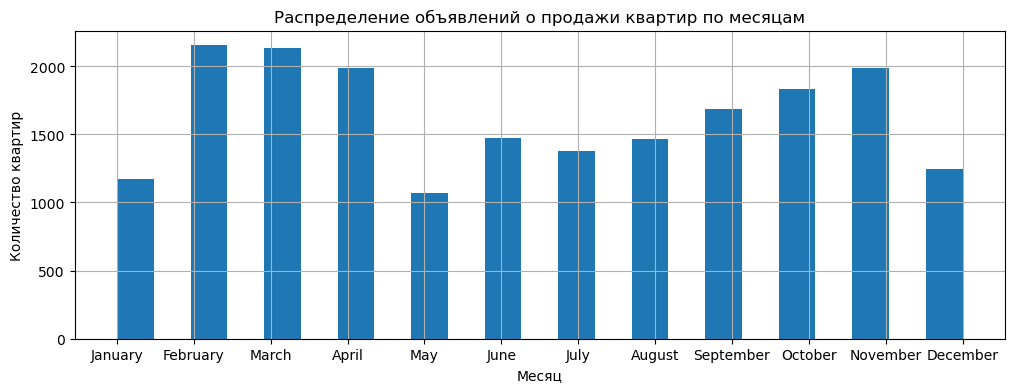

In [207]:
data.sort_values(by = 'month')['month_exposition'].hist(bins = 23,figsize = (12,4))
plt.ylabel('Количество квартир')
plt.title('Распределение объявлений о продажи квартир по месяцам')
plt.xlabel('Месяц')
plt.show()

На данном графике видно, что квартиры чаще всего продаются в конце зимы начале весны, затем идёт резкий спад после которого начинается медленный подъём до пика в ноябре с последующим резким спадом

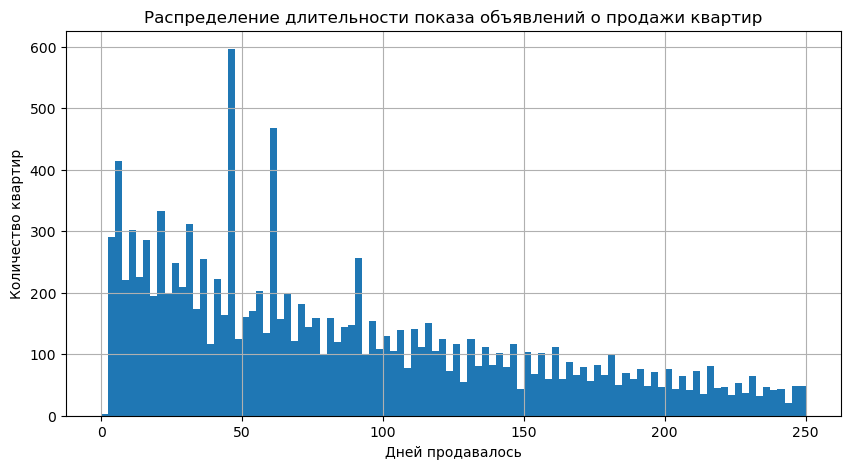

In [211]:
plt.figure(figsize = (10,5))
data['days_exposition'].hist(bins = 100, range=(0,250))
plt.ylabel('Количество квартир')
plt.xlabel('Дней продавалось')
plt.title('Распределение длительности показа объявлений о продажи квартир')
plt.show()

In [209]:
data['days_exposition'].describe()

count    16856.000000
mean       186.678097
std        222.665053
min          1.000000
25%         45.000000
50%        103.000000
75%        241.000000
max       1572.000000
Name: days_exposition, dtype: float64

Изучив столбец времени продажи квартир можно сказать в половине случаев квартиры продаются за 100 день в 75% они продаются за 237

Необычайно долго продавалась за 1580, но это случай я полагаю единичный

Всплески на 45, 60 и 90 вероятно связаны с автоматическим снятием объявления

Продажу до 45 дней можно считать быстрой, 103 дня нормой, а продажу в 241 день долгой

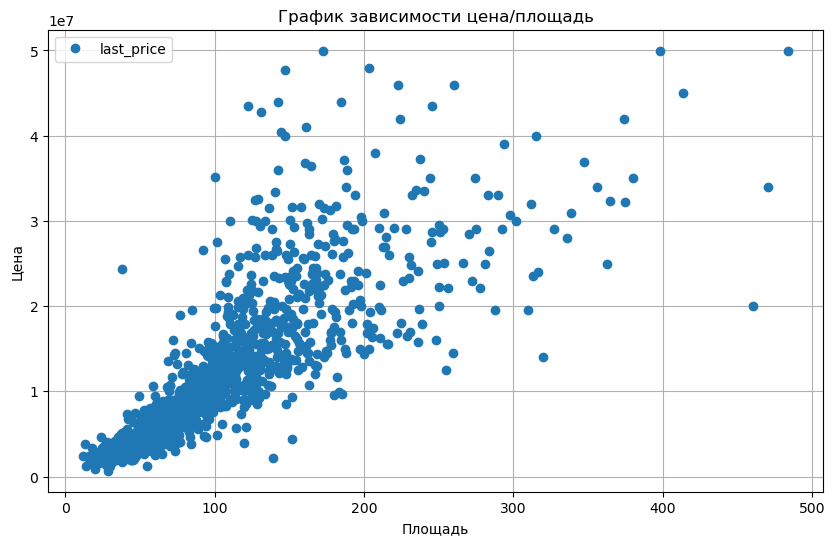

,last_price,total_area
last_price,1.00000,0.86315
total_area,0.86315,1.00000


In [225]:
data.pivot_table(index = 'total_area',values = 'last_price').plot(grid = True, style = 'o',figsize=(10, 6))
plt.title('График зависимости цена/площадь')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show()
data.pivot_table(index = 'floor',values = ['total_area','last_price']).corr()

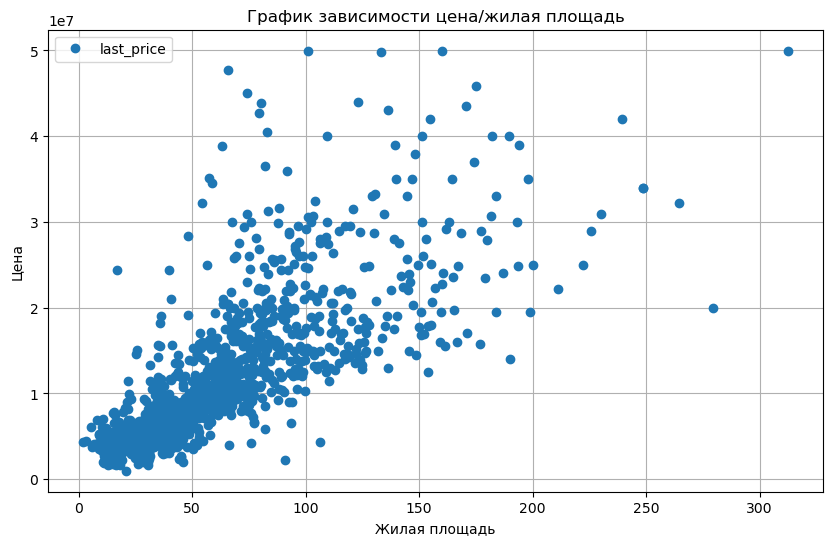

,last_price,living_area
last_price,1.000000,0.692796
living_area,0.692796,1.000000


In [227]:
data.pivot_table(index = 'living_area',values = 'last_price').plot(grid = True,style = 'o', figsize = (10,6))
plt.title('График зависимости цена/жилая площадь')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.show()
data.pivot_table(index = 'floor',values = ['living_area','last_price']).corr()

На 2х предыдущих диаграммах видная сильная корреляция, что не удивительно чем больше площадь тем выше цена

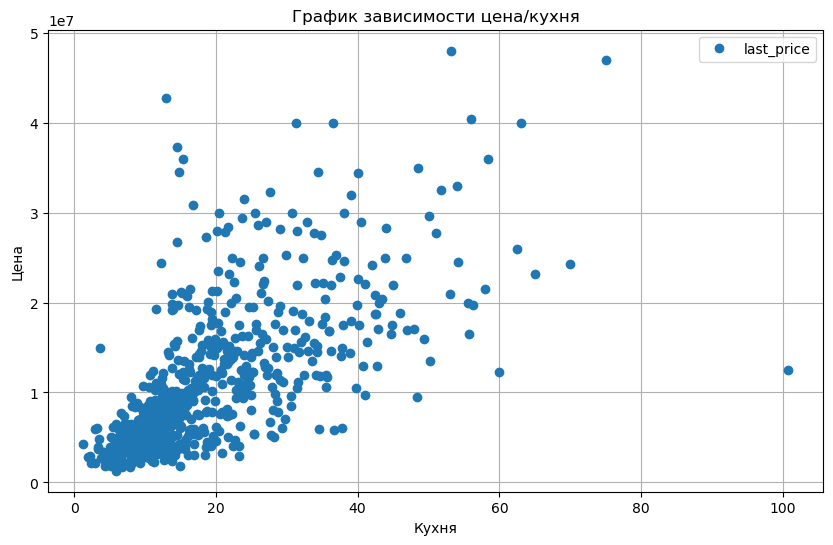

,kitchen_area,last_price
kitchen_area,1.000000,0.353496
last_price,0.353496,1.000000


In [228]:
data.pivot_table(index = 'kitchen_area', values = 'last_price').plot(grid = True, style = 'o', figsize = (10,6))
plt.title('График зависимости цена/кухня')
plt.xlabel('Кухня')
plt.ylabel('Цена')
plt.show()
data.pivot_table(index = 'floor',values = ['kitchen_area','last_price']).corr()

От кухни зависимость пониже

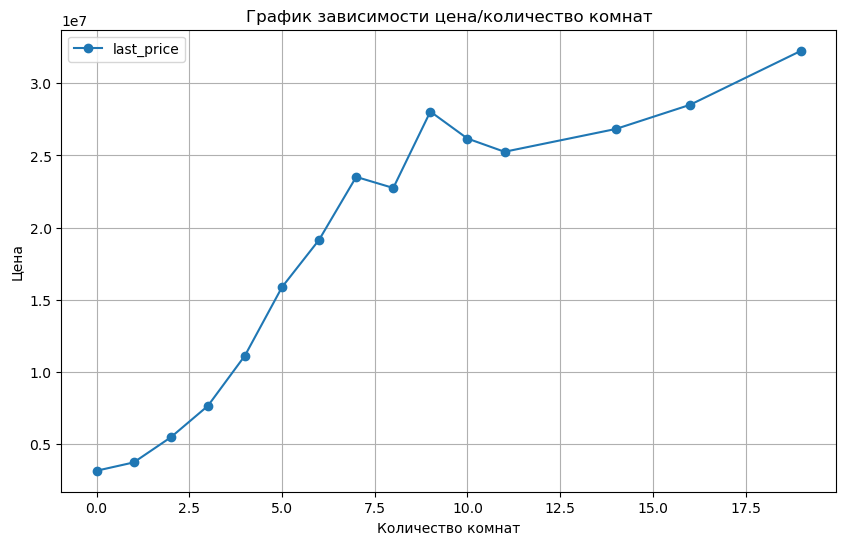

,last_price,rooms
last_price,1.000000,0.500065
rooms,0.500065,1.000000


In [229]:
data.pivot_table(index = 'rooms',values = 'last_price').plot(grid = True,style = 'o-', figsize = (10,6))
plt.title('График зависимости цена/количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()
data.pivot_table(index = 'floor',values = ['rooms','last_price']).corr()

Чем больше комнат, тем больше площадь и тем выше цена

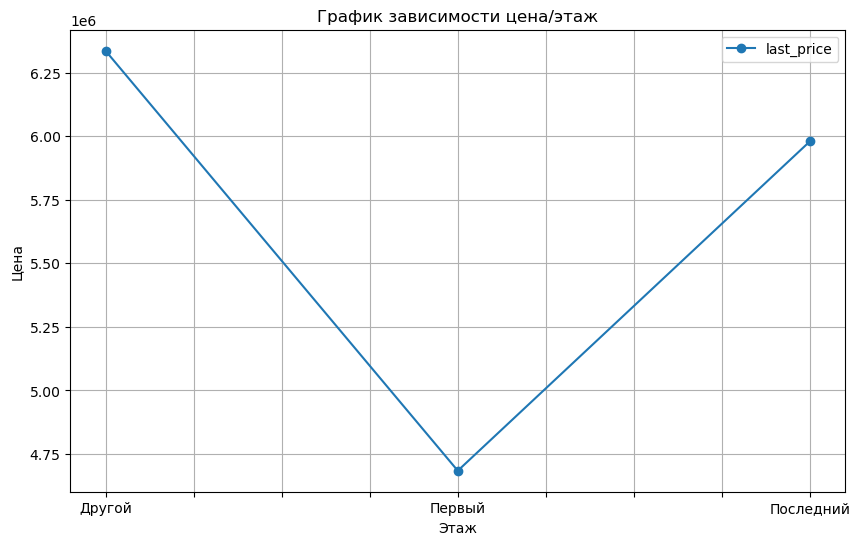

In [230]:
data.pivot_table(index = 'floor_type', values = 'last_price').plot(grid = True, style = 'o-', figsize = (10,6))
plt.title('График зависимости цена/этаж')
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()

Цены на первом этаж заметно ниже

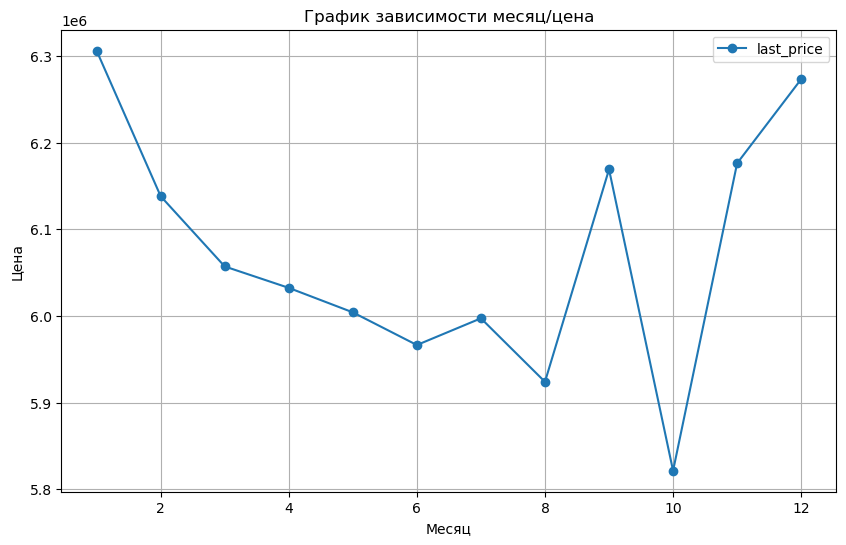

In [250]:
data.pivot_table(index = 'month', values = 'last_price').plot(grid=True,style = 'o-',figsize = (10,6))
plt.title('График зависимости месяц/цена')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

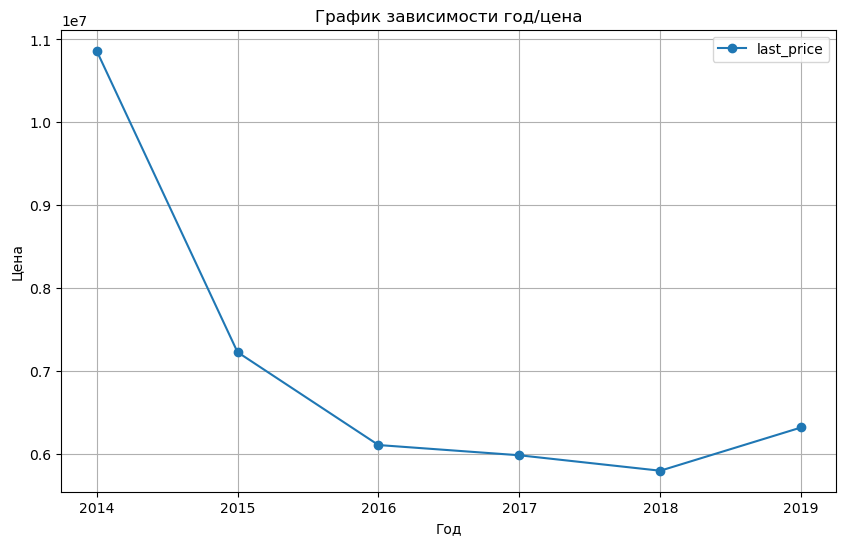

In [251]:
data.pivot_table(index = 'year', values = 'last_price').plot(grid=True,style = 'o-',figsize = (10,6))
plt.title('График зависимости год/цена')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

Квартиры сильно подешевели за несколько лет

In [222]:
top_ten_city = data['locality_name'].value_counts().head(10)
top_ten_city

Санкт-Петербург      13161
посёлок Мурино         374
посёлок Шушары         358
Всеволожск             331
Пушкин                 321
Колпино                302
Гатчина                257
посёлок Парголово      248
деревня Кудрово        203
Выборг                 189
Name: locality_name, dtype: int64

Санкт-Петербург город многомилионный и квартир там продается соответствующе много

In [223]:
top_ten_city_price = data.query('locality_name in @top_ten_city.index').pivot_table(index = 'locality_name', values = 'price_for_meter2', aggfunc = 'mean')

top_ten_city_price.sort_values('price_for_meter2',ascending = False).astype(int)

,price_for_meter2
locality_name,
Санкт-Петербург,110949
Пушкин,102790
деревня Кудрово,92408
посёлок Парголово,89018
посёлок Мурино,84911
посёлок Шушары,77921
Колпино,74933
Всеволожск,68514
Гатчина,68206


Как и ожидалось в Петербурге самое дорогое жильё но ближний пригород активно застраивается/развивается и цены

там соответствующе высоки

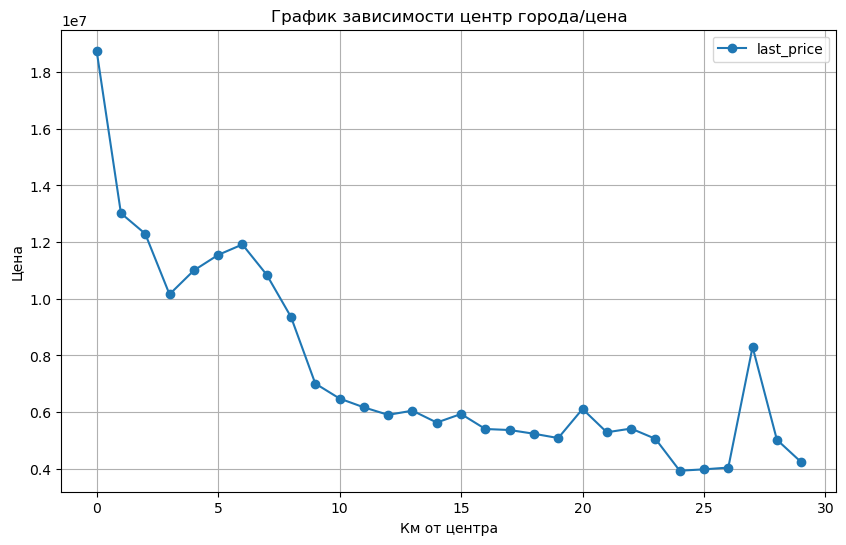

In [252]:
data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'city_centers_nearest', values = 'last_price').plot(grid = True, style = 'o-', figsize = (10,6))
plt.title('График зависимости центр города/цена')
plt.xlabel('Км от центра')
plt.ylabel('Цена')
plt.show()

Чем ближе к центру тем цены выше и графики показали зависимость цены от места, площади и комнат

### Общий вывод

Получив данные по квартирам в Санкт-Питербурге и окрестностях, подготовил к работе, построил графики и таблицы.

Больше всего продаётся 1 и 2‐х немного реже 3‐х комнатные квартиры, в 5ти и 10и этажных домах.

Площадь у квартир чаще всего 60м2, 45-50м2 и 30м2.

Средняя стоимость так же зависит от комнат в среднем 1комнатные стоят 3.5‐м, 2х комнатные 5.5‐м 3шки около 7‐ми.

На графиках видна явная корреляция цены и площади.

Цены выше всего в Санкт-Петербурге в среднем 106046 за м2, но чем дальше от центра тем площадь дешевле.

Чаще всего квартиры продаются за 100 дней, 45 и меньше это довольно быстро, а 241 это долго.

Так же заметил что на первом этаже цены на недвижимость ниже чем на других этажах.

Чаще всего квартиры продаются в конце зимы начале весны, и осенью.